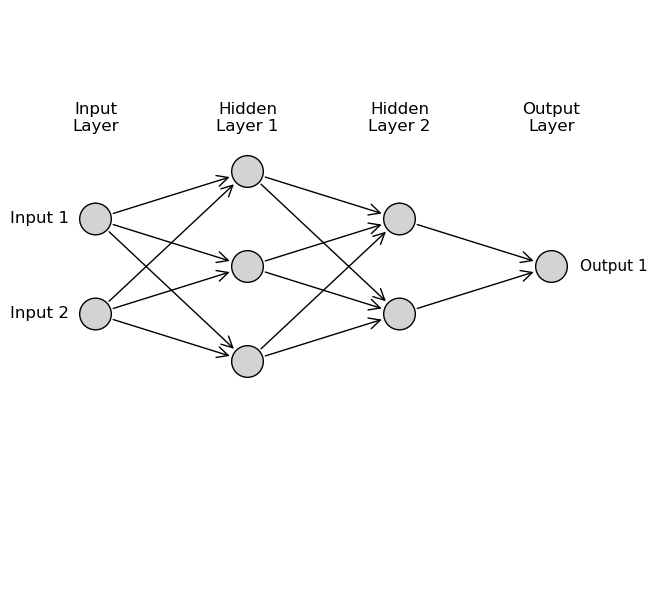

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

layer_sizes = [2, 3, 2, 1]
left, right = 0.1, 0.9
bottom, top = 0.3, 0.8

n_layers = len(layer_sizes)
v_spacing = (top - bottom) / max(layer_sizes)
h_spacing = (right - left) / (n_layers - 1)
node_radius = v_spacing / 6.

# Draw nodes
positions = []
for i, layer_size in enumerate(layer_sizes):
    layer_positions = []
    layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
    for j in range(layer_size):
        x = i * h_spacing + left
        y = layer_top - j * v_spacing
        circle = plt.Circle((x, y), node_radius, color='lightgray', ec='k', zorder=4)
        ax.add_artist(circle)
        layer_positions.append((x, y))
    positions.append(layer_positions)

from matplotlib.patches import FancyArrowPatch
import numpy as np

# Draw edges with visible arrows ending at node borders
for i in range(n_layers - 1):
    for (x1, y1) in positions[i]:
        for (x2, y2) in positions[i + 1]:
            dx, dy = x2 - x1, y2 - y1
            dist = np.hypot(dx, dy)
            ux, uy = dx / dist, dy / dist
            start = (x1 + ux * node_radius, y1 + uy * node_radius)
            end = (x2 - ux * node_radius, y2 - uy * node_radius)
            arrow = FancyArrowPatch(start, end, arrowstyle='->', color='k', mutation_scale=20, lw=1)
            ax.add_patch(arrow)

# Draw labels above layers
layer_labels = [f'Input\nLayer', f'Hidden\nLayer 1', f'Hidden\nLayer 2' ,f'Output\nLayer']
for i, label in enumerate(layer_labels):
    x = i * h_spacing + left
    ax.text(x, top + 0.01, label, ha='center', va='center', fontsize=12)

# Draw input labels
for i in range(layer_sizes[0]):
    ax.text(left - 0.15, positions[0][i][1], f'Input {i+1}', va='center', fontsize=12)

output_x, output_y = positions[-1][0]
ax.text(output_x + 0.05, output_y, 'Output 1', va='center', fontsize=11)

ax.set_aspect('equal')
plt.tight_layout()
plt.savefig("img/neural_network_schema.png", dpi=300, bbox_inches='tight')
plt.savefig("img/neural_network_schema.pdf", bbox_inches='tight')
plt.show()